# Assignment: Data Visualization with Matplotlib

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

## Importing The CSV File.

In [21]:
df = pd.read_csv("D:/GITHUB Uploads/ClassWorks-of-SongJog/Python H_W/unit_4_class_4/Assignment_20/sales_data.csv")

df

,Month,Region,Product Category,Sales ($),Units Sold,Profit ($)
0,Jan,North,Electronics,28654,229,11179.15
1,Jan,North,Clothing,26575,238,8487.26
2,Jan,North,Home Appliances,11265,260,2478.24
3,Jan,North,Furniture,26962,137,7191.89
4,Jan,North,Sports,21023,180,4291.15
...,...,...,...,...,...,...
235,Dec,West,Electronics,28486,194,7291.07
236,Dec,West,Clothing,27516,261,8820.43
237,Dec,West,Home Appliances,22308,190,8525.79
238,Dec,West,Furniture,24708,183,9635.13


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             240 non-null    object 
 1   Region            240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Sales ($)         240 non-null    int64  
 4   Units Sold        240 non-null    int64  
 5   Profit ($)        240 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 11.4+ KB


In [23]:
df.head()

,Month,Region,Product Category,Sales ($),Units Sold,Profit ($)
0,Jan,North,Electronics,28654,229,11179.15
1,Jan,North,Clothing,26575,238,8487.26
2,Jan,North,Home Appliances,11265,260,2478.24
3,Jan,North,Furniture,26962,137,7191.89
4,Jan,North,Sports,21023,180,4291.15


In [24]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.strftime('%b')

df.columns

Index(['Month', 'Region', 'Product Category', 'Sales ($)', 'Units Sold',
       'Profit ($)'],
      dtype='object')

# 1. Basic Line Plot

* Create a line plot showing sales trends over the months for each Product Category.
* Label the bars and use different colors for each region.

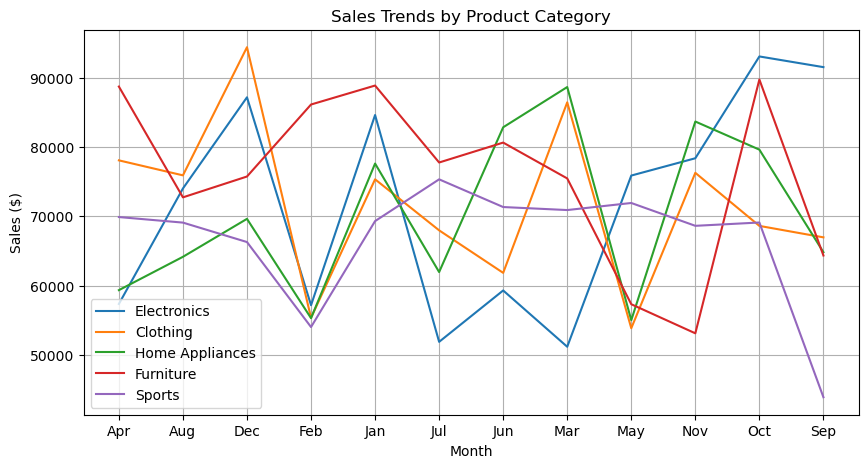

In [25]:
plt.figure(figsize=(10, 5))
for category in df['Product Category'].unique():
    subset = df[df['Product Category'] == category].groupby('Month')['Sales ($)'].sum()
    plt.plot(subset.index, subset.values, label=category)

plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.title("Sales Trends by Product Category")
plt.legend()
plt.grid()
plt.show()

# 2. Bar Chart

* Create a bar chart to compare total sales across different regions.
* Label the bars and use different colors for each region.

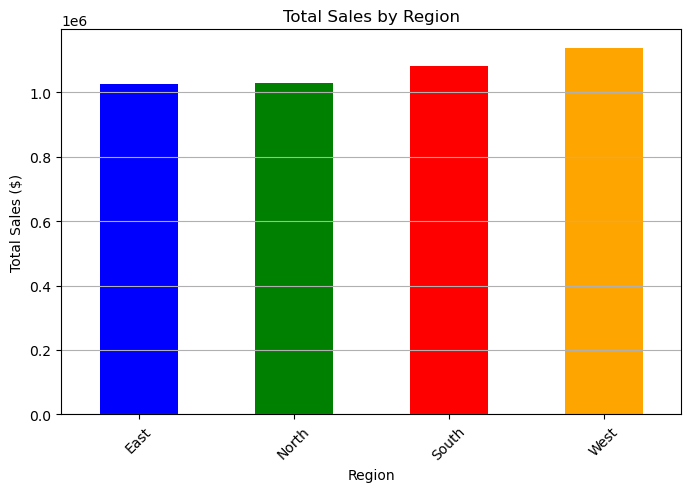

In [26]:
region_sales = df.groupby('Region')['Sales ($)'].sum()
plt.figure(figsize=(8, 5))
region_sales.plot(kind='bar', color=['blue', 'green', 'red', 'orange'])
plt.xlabel("Region")
plt.ylabel("Total Sales ($)")
plt.title("Total Sales by Region")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 3. Pie Chart

* Create a pie chart to show the percentage of total sales for each Product Category in
March.

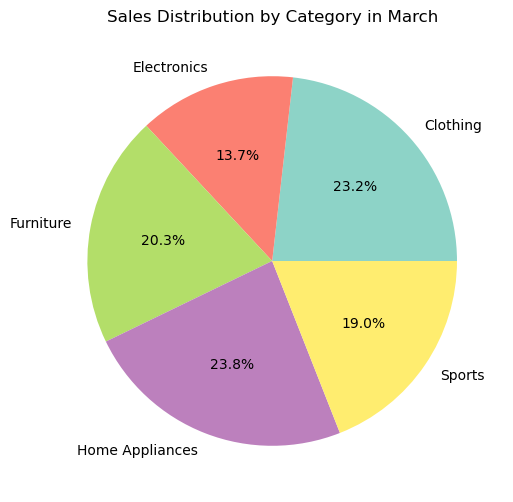

In [27]:
march_sales = df[df['Month'] == 'Mar'].groupby('Product Category')['Sales ($)'].sum()
plt.figure(figsize=(6, 6))
march_sales.plot(kind='pie', autopct='%1.1f%%', cmap='Set3')
plt.title("Sales Distribution by Category in March")
plt.ylabel("")
plt.show()

# 4. Scatter Plot

* Create a scatter plot showing the relationship between Units Sold and Sales ($).
* Differentiate points using colors for different product categories.

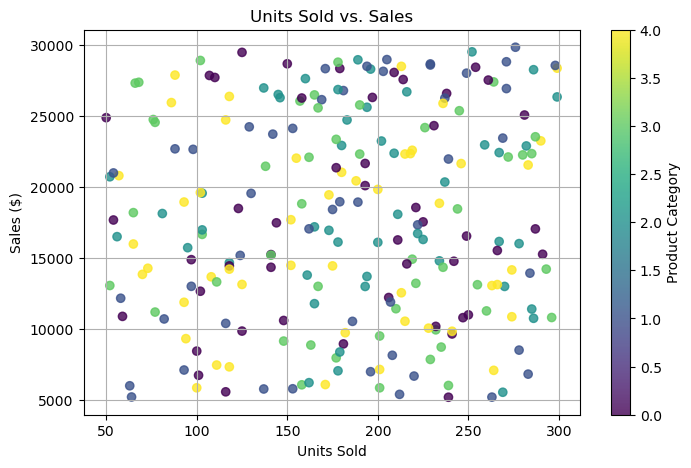

In [42]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Units Sold'], df['Sales ($)'], c=df['Product Category'].astype('category').cat.codes, cmap='viridis', alpha=0.8)
plt.xlabel("Units Sold")
plt.ylabel("Sales ($)")
plt.title("Units Sold vs. Sales")
plt.colorbar(label='Product Category')
plt.grid()
plt.show()


# 5. Histogram

* Create a histogram to show the distribution of Profit ($).

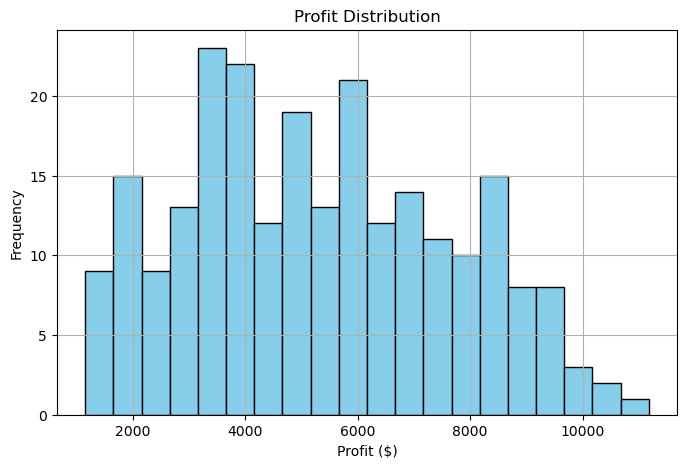

In [29]:
plt.figure(figsize=(8, 5))
plt.hist(df['Profit ($)'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Profit ($)")
plt.ylabel("Frequency")
plt.title("Profit Distribution")
plt.grid()
plt.show()

# 6. Subplots

* Use subplots to combine at least 3 of the above visualizations into a single figure.

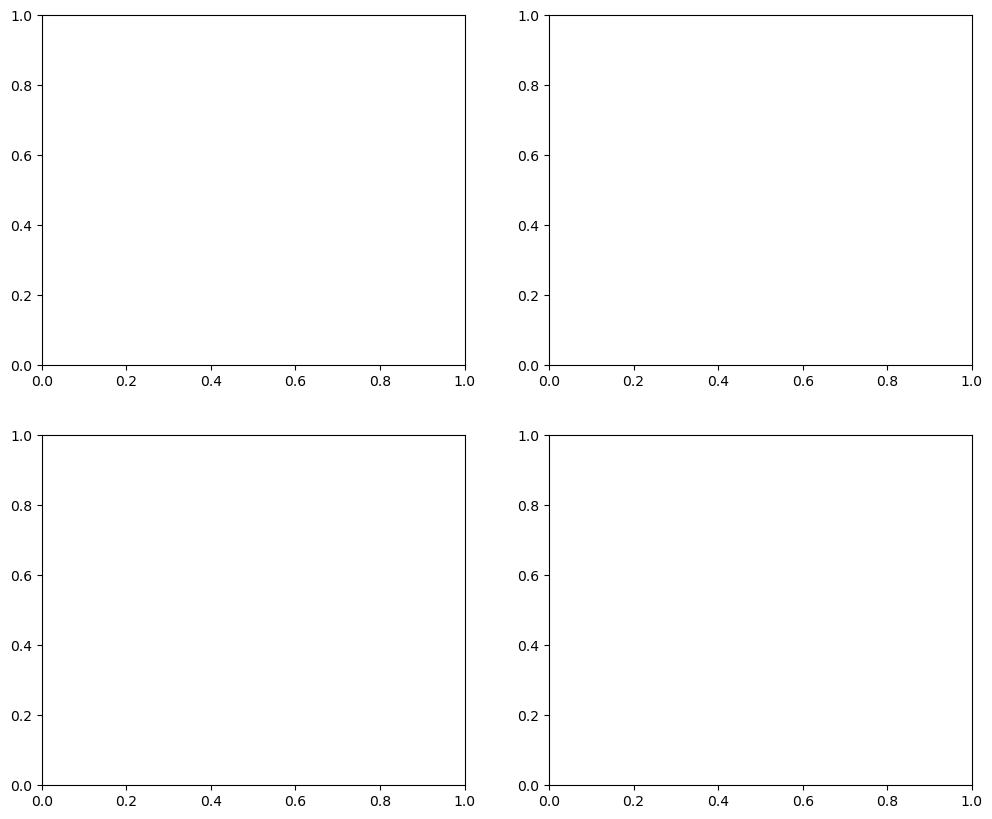

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

### Line Plot in subplot

In [31]:
for category in df['Product Category'].unique():
    subset = df[df['Product Category'] == category].groupby('Month')['Sales ($)'].sum()
    axes[0, 0].plot(subset.index, subset.values, label=category)
axes[0, 0].set_title("Sales Trends")
axes[0, 0].legend()
axes[0, 0].grid()

subset


Month
Apr    69901
Aug    69098
Dec    66292
Feb    54017
Jan    69314
Jul    75345
Jun    71346
Mar    70910
May    71931
Nov    68634
Oct    69112
Sep    43884
Name: Sales ($), dtype: int64

### Bar Chart in subplot

In [32]:
region_sales.plot(kind='bar', ax=axes[0, 1], color=['blue', 'green', 'red', 'orange'])
axes[0, 1].set_title("Sales by Region")
axes[0, 1].grid(axis='y')

region_sales

Region
East     1026197
North    1030306
South    1080925
West     1138578
Name: Sales ($), dtype: int64

### Pie Chart in subplot

In [33]:
march_sales.plot(kind='pie', ax=axes[1, 0], autopct='%1.1f%%', cmap='Set3')
axes[1, 0].set_title("March Sales Distribution")
axes[1, 0].set_ylabel("")

march_sales

Product Category
Clothing           86463
Electronics        51172
Furniture          75477
Home Appliances    88674
Sports             70910
Name: Sales ($), dtype: int64

### Scatter Plot in subplot

In [34]:
axes[1, 1].scatter(df['Units Sold'], df['Sales ($)'], c=df['Product Category'].astype('category').cat.codes, cmap='viridis', alpha=0.7)
axes[1, 1].set_title("Units Sold vs. Sales")
axes[1, 1].grid()

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>